# Setup

In [ ]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.5 MB/s 
     |████████████████████████████████| 189 kB 54.0 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 51 kB 319 kB/s 


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars')
path.ls()

(#10) [Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/t-cross'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/kicks'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/duster'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/nivus'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/tiggo'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/hr-v'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/tracker'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/renegade'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/compass'),Path('/content/gdrive/MyDrive/Colab Notebooks/tccmba/cars/creta')]

# Data Loader

In [ ]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [ ]:
dls = cars.dataloaders(path)

In [ ]:
dls.vocab

['compass', 'creta', 'duster', 'hr-v', 'kicks', 'nivus', 'renegade', 't-cross', 'tiggo', 'tracker']

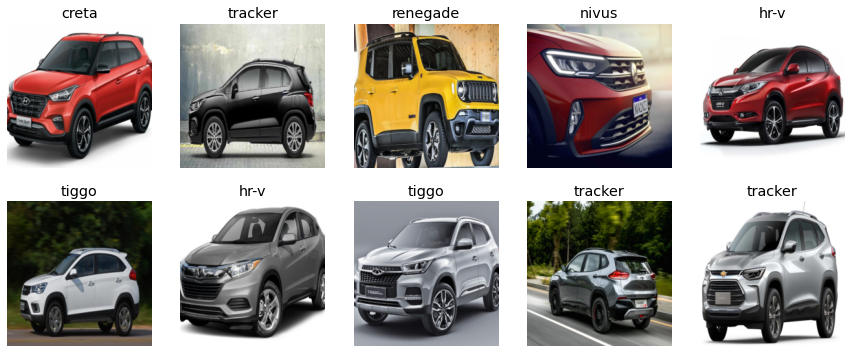

In [ ]:
dls.valid.show_batch(max_n=10, nrows=2)

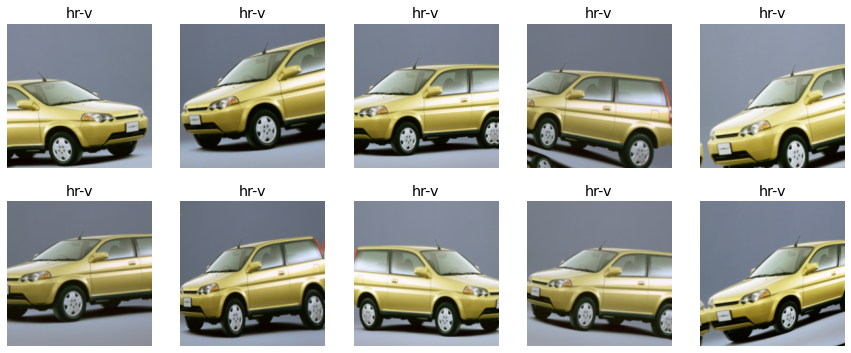

In [ ]:
# verificando data augmentation
dls.train.show_batch(max_n=10, nrows=2, unique=True)

Data augmentation funcionou!

# Fine Tune

## resnet50

In [ ]:
# resnet50
learn = cnn_learner(dls, resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(epochs=5)

epoch,train_loss,valid_loss,accuracy,time
0,2.244632,1.082607,0.672764,11:30


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,1.056145,0.674333,0.792683,02:05
1,0.750814,0.495185,0.829268,02:04
2,0.503462,0.394323,0.890244,02:04
3,0.344981,0.210861,0.930894,02:04
4,0.239706,0.199062,0.930894,02:04


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


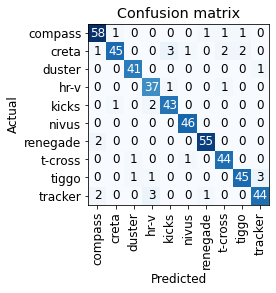

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## resnet18

In [ ]:
# resnet18
learn_resnet18 = cnn_learner(dls, resnet18, metrics=accuracy)
learn_resnet18.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.763653,1.447431,0.536585,01:53


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,1.556409,1.074031,0.638211,01:55
1,1.215970,0.700786,0.747967,01:55
2,0.913384,0.540144,0.794715,01:54
3,0.679020,0.467997,0.835366,01:54
4,0.543372,0.450847,0.833333,01:57


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


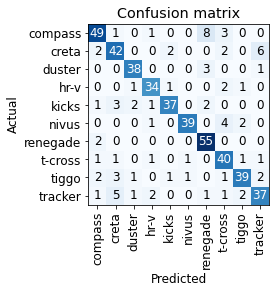

In [ ]:
interp_resnet18 = ClassificationInterpretation.from_learner(learn_resnet18)
interp_resnet18.plot_confusion_matrix()

## resnet34

In [ ]:
# resnet34
learn_resnet34 = cnn_learner(dls, resnet34, metrics=accuracy)
learn_resnet34.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.715767,1.336161,0.556911,01:58


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,1.451045,0.954895,0.674797,02:02
1,1.077052,0.541213,0.829268,02:02
2,0.725031,0.335103,0.904472,02:01
3,0.515165,0.308174,0.896341,02:01
4,0.375753,0.302083,0.904472,02:03


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


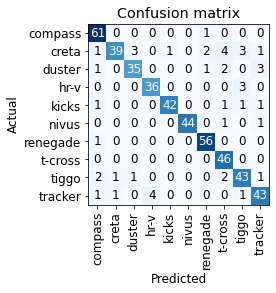

In [ ]:
interp_resnet34 = ClassificationInterpretation.from_learner(learn_resnet34)
interp_resnet34.plot_confusion_matrix()

In [ ]:
# resnet101
learn_resnet101 = cnn_learner(dls, resnet101, metrics=accuracy)
learn_resnet101.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,2.206436,1.229806,0.652439,02:12


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,0.980986,0.598087,0.823171,02:22
1,0.663576,0.482445,0.859756,02:23
2,0.455424,0.319950,0.896341,02:22
3,0.300036,0.208526,0.920732,02:21
4,0.203913,0.185174,0.924797,02:22


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

In [ ]:
interp_resnet101 = ClassificationInterpretation.from_learner(learn_resnet101)
interp_resnet101.plot_confusion_matrix()

## alexnet

In [ ]:
# alexnet
learn_alexnet = cnn_learner(dls, alexnet, metrics=accuracy)
learn_alexnet.fine_tune(epochs=5)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,3.070072,1.795595,0.426829,01:47


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,2.168599,1.584770,0.461382,01:50
1,1.917669,1.308116,0.575203,01:49
2,1.668778,1.172875,0.587398,01:50
3,1.468229,1.084940,0.638211,01:51
4,1.302294,1.054023,0.648374,01:51


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


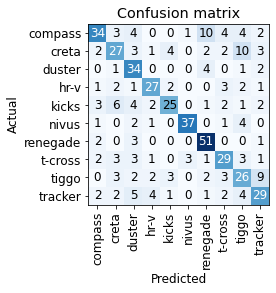

In [ ]:
interp_alexnet = ClassificationInterpretation.from_learner(learn_alexnet)
interp_alexnet.plot_confusion_matrix()

# Inference

O melhor modelo até então foi a resnet50. Vamos salvá-lo e utilizá-lo para realizar novas predições.

In [ ]:
models_path = path.parent/'models'

In [ ]:
learn.export(fname=models_path/'model_export.pkl')

In [ ]:
learn.predict(path.parent/'cars_to_predict/t-cross.jpg')

('t-cross',
 tensor(7),
 tensor([1.4687e-05, 1.0264e-03, 2.5669e-04, 3.6596e-05, 5.0089e-04, 1.9960e-02, 8.4341e-06, 9.7193e-01, 2.3520e-03, 3.9171e-03]))

In [ ]:
learn.dls.vocab

['compass', 'creta', 'duster', 'hr-v', 'kicks', 'nivus', 'renegade', 't-cross', 'tiggo', 'tracker']